In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

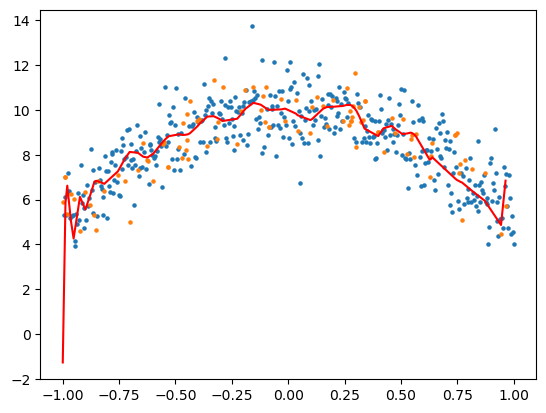

In [110]:
# Sample data
np.random.seed(42)
X = np.linspace(-1, 1, 500)
y = 10 * np.cos(X) + np.random.normal(0, 1, size=len(X))

count_test = 100
test_inds = np.random.randint(0, len(X), size=count_test)
train_inds = list(set(range(len(X))) - set(test_inds))

X_train = X[train_inds]
X_test = X[test_inds]

y_train = y[train_inds]
y_test = y[test_inds]

plt.scatter(X_train, y_train, s=5)
plt.scatter(X_test, y_test, s=5)

# Polynomial transformation
degree = 50
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_train.reshape(-1, 1))

# Train model
model = LinearRegression().fit(X_poly, y_train)

# Prediction
y_pred = model.predict(X_poly)
# plt.plot(X_train, y_pred, c='r')

X_test_sorted = np.sort(X_test)
X_poly_test = poly.fit_transform(X_test_sorted.reshape(-1, 1))
y_pred_test = model.predict(X_poly_test)
plt.plot(X_test_sorted, y_pred_test, c='r')